# Compare Bottle vs CTD measurements

In [2]:
library(tidyverse)
library(ggdark)

In [5]:
hots_data = read.csv("../data/parsed/bare-minimum-requirements-2022.csv")
hots_data[hots_data < 0] <- NA
compare_data <- hots_data %>% select(boxy, coxy, csal, bsal) 

In [6]:
compare_data = compare_data[complete.cases(compare_data),]
compare_data <- compare_data
compare_data = data.frame(scale(compare_data, center = TRUE))
head(compare_data)

,boxy,coxy,csal,bsal
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.5103876,0.4793589,-0.1275713,-0.1205336
3,0.4772295,0.4825241,-0.5569202,-0.5570218
4,-1.0575133,-1.0367565,-1.8330043,-1.8365720
5,-1.8675165,-1.9055951,-0.6216736,-0.6223129
6,0.8040729,0.7958757,0.8960005,0.8952508
7,0.8735469,0.8813352,1.2863413,1.2885584


Compare boxy vs coxy

[1] 2.020387

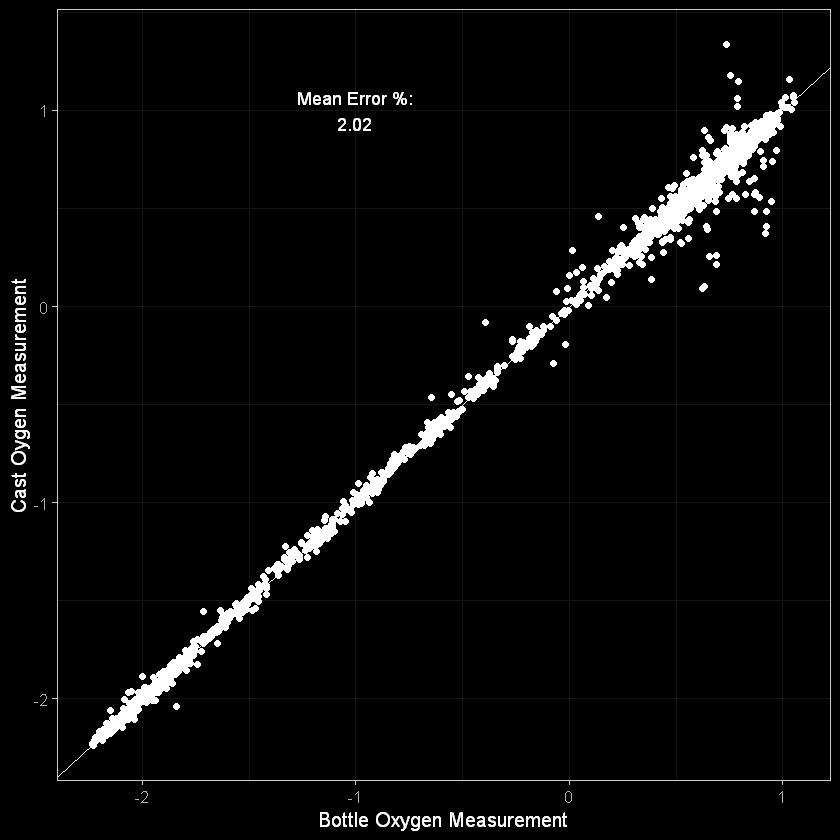

In [8]:
err = mean(sqrt((compare_data$boxy - compare_data$coxy)^2))*100
err
p <- ggplot(compare_data) +
        geom_point(aes(x = boxy, 
                       y= coxy),
                       show.legend = FALSE ) + 
        geom_abline(slope=1) +
        dark_theme_bw(base_size = 12) +
        labs(x = "Bottle Oxygen Measurement",
             y = "Cast Oygen Measurement") +
        annotate("text", x = -1, y = 1, 
                 label = paste0("Mean Error %:\n",round(err, digits=3) ))
p         
# ggsave("Oxygen_bottle_vs_cast.svg", p, width = 89, height = 89, units = "mm")

Warning message:
"Removed 481 rows containing missing values (geom_point)."


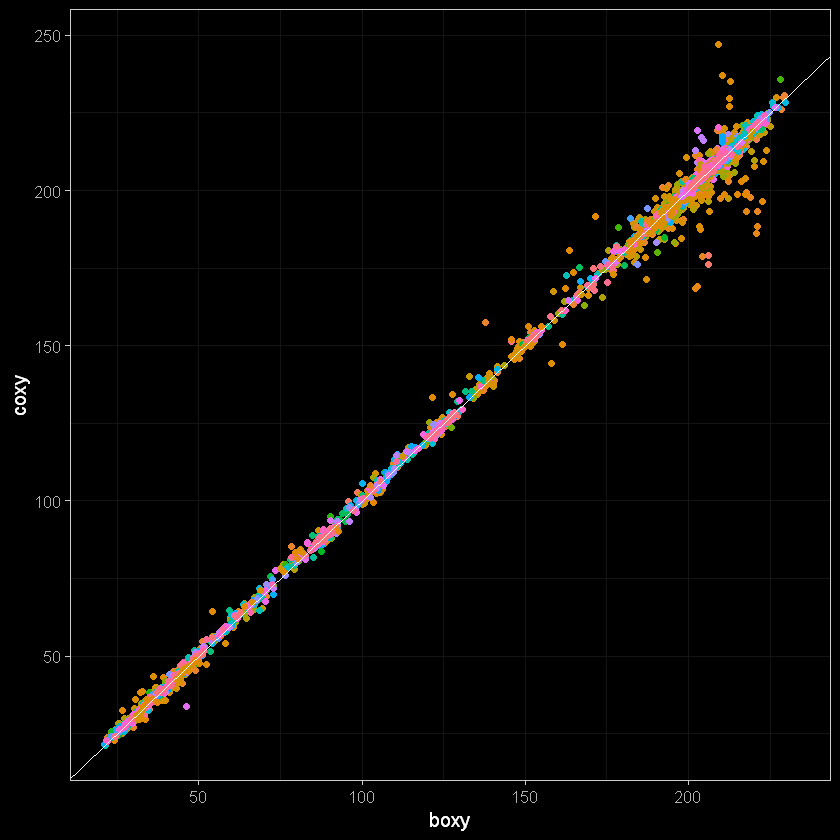

In [11]:
ggplot(hots_data) + geom_point(aes(x = boxy, 
                                   y= coxy,
                                   color = as.factor(crn)), 
                               show.legend = FALSE ) +
                    dark_theme_bw(base_size = 12) +
                    geom_abline(slope=1)

[1] 0.5761618

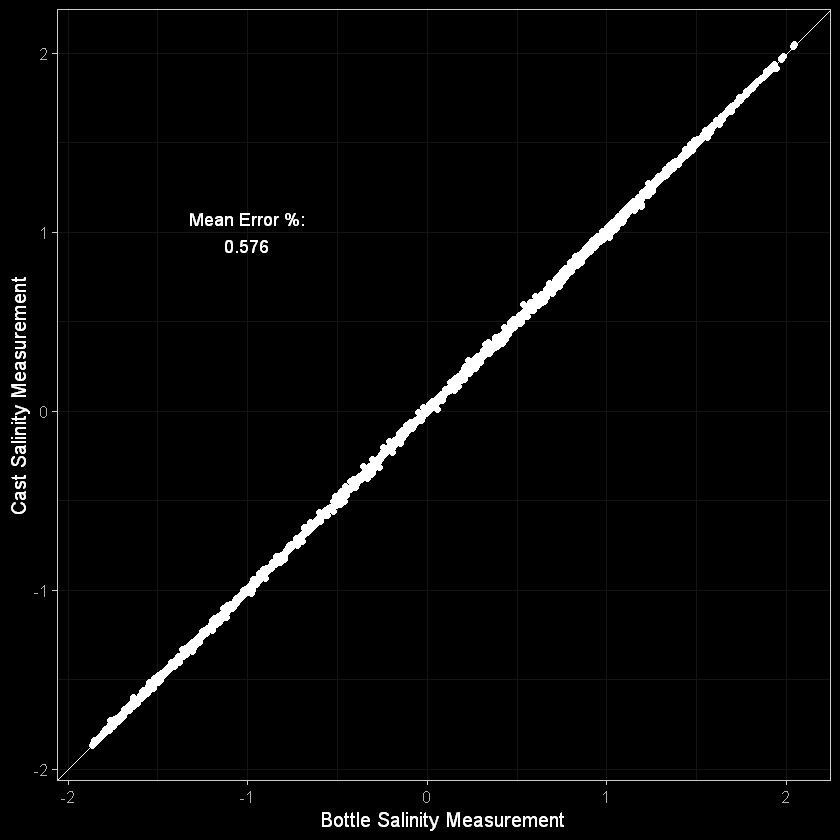

In [12]:
err = mean(sqrt((compare_data$csal - compare_data$bsal)^2))*100
err
p <- ggplot(compare_data) +
        geom_point(aes(x = csal, 
                       y= bsal),
                       show.legend = FALSE ) + 
        geom_abline(slope=1) +
        dark_theme_bw(base_size = 12) +
        labs(x = "Bottle Salinity Measurement",
             y = "Cast Salinity Measurement") +
        annotate("text", x = -1, y = 1, 
                 label = paste0("Mean Error %:\n",round(err, digits=3) ))
        # scale_x_continuous(lim = c(33.5,NA)) +
        # scale_y_continuous(lim = c(33.5,NA))
p 
# ggsave("Salinity_bottle_vs_cast.svg", p, width = 89, height = 89, units = "mm")